# PROBLEM INVOLVING CATEGORICAL VARIABLES IN REGRESSION ANALYSIS::

## PROBLEM STATEMENT::

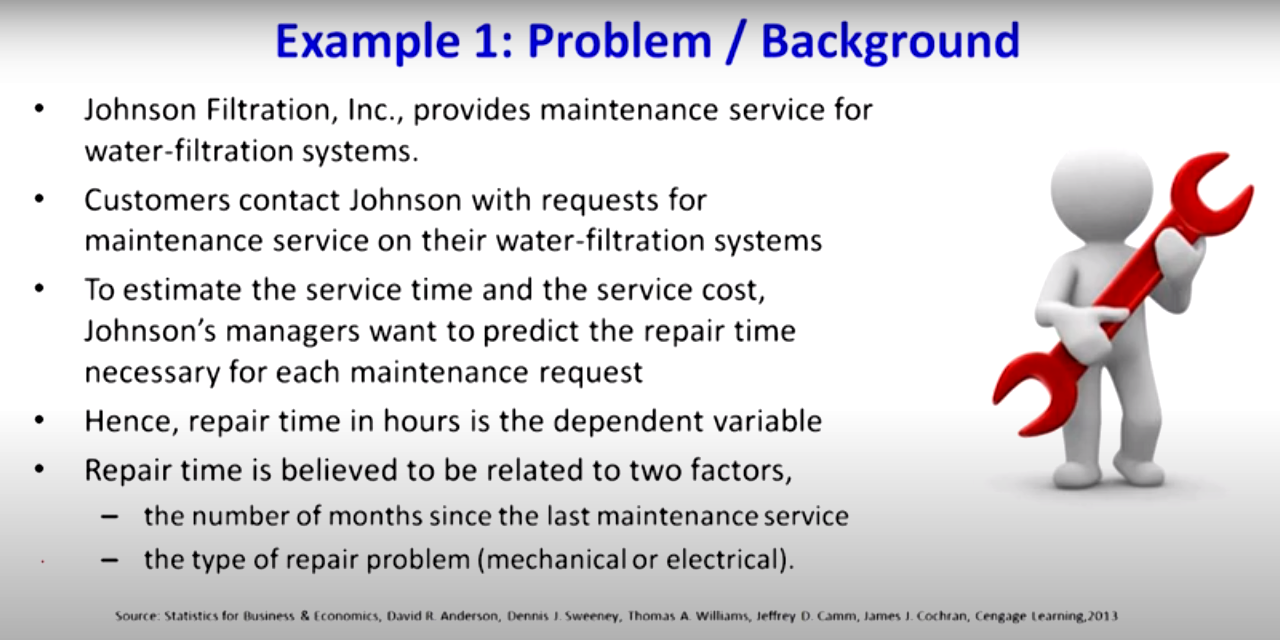

## DATA

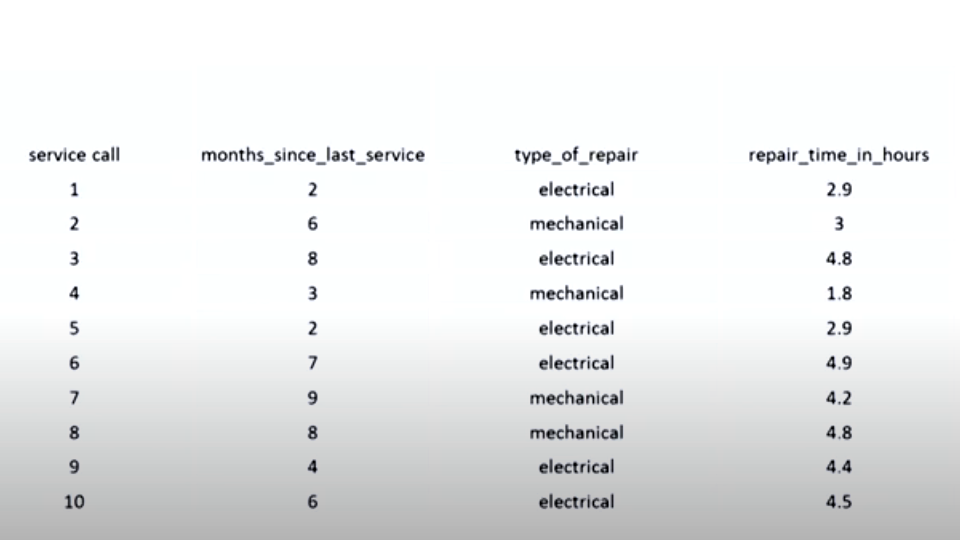

## SOLUTION::

In [2]:
import pandas as pd

data = pd.read_excel('/home/ashish/projects/multipleregression2_dummy/dummy.xlsx')
data

,servicecall,months_since_last_service,type_of_repair,repair_time_in_hours
0,1,2,electrical,2.9
1,2,6,mechanical,3.0
2,3,8,electrical,4.8
3,4,3,mechanical,1.8
4,5,2,electrical,2.9
5,6,7,electrical,4.9
6,7,9,mechanical,4.2
7,8,8,mechanical,4.8
8,9,4,electrical,4.4
9,10,6,electrical,4.5


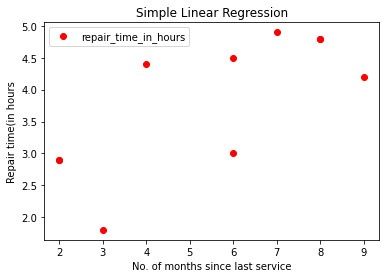

In [14]:
## Scatter plot for months_since_last_service VS repair_time_in_hours

import matplotlib.pyplot as plt

## x = data['months_since_last_service']
## y = data['repair_time_in_hours']
##plt.scatter(x,y,color="green") 

data.plot('months_since_last_service','repair_time_in_hours',style='o',color="red")
plt.xlabel("No. of months since last service")
plt.ylabel('Repair time(in hours')
plt.title('Simple Linear Regression')
plt.show()

In [18]:
## Getting the summary of our Linear regression model for repair_time-in_hours and no. of months since last service
from statsmodels.formula.api import ols
model = ols(formula="repair_time_in_hours~months_since_last_service",data=data).fit()
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     repair_time_in_hours   R-squared:                       0.534
Model:                              OLS   Adj. R-squared:                  0.476
Method:                   Least Squares   F-statistic:                     9.174
Date:                  Sun, 16 Jan 2022   Prob (F-statistic):             0.0163
Time:                          23:25:07   Log-Likelihood:                -10.602
No. Observations:                    10   AIC:                             25.20
Df Residuals:                         8   BIC:                             25.81
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

/home/ashish/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## IMPORTANT NOTE::
    From the summary of regression table it can be easily identified
    that R-squared and adjusted R-squared are very low. This implies that
    the variability of the model cannot be just explained only by the
    variable months_since_last_service.

## regression equation for repair time vs. last service done::
    repair_time_in_hours = 2.1473 + 0.3041*months_since_last_service

In [20]:
## anova table for the regression model
from statsmodels.stats.anova import anova_lm
anova_table = anova_lm(model,typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
months_since_last_service,1.0,5.596033,5.596033,9.173887,0.016338
Residual,8.0,4.879967,0.609996,NaN,NaN


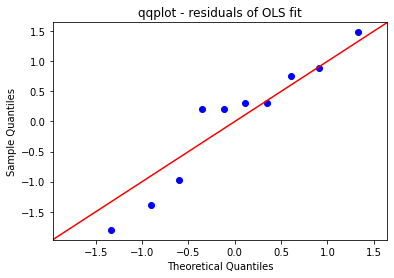

In [27]:
## Normal Probability Plot

import statsmodels.api 
from scipy import stats

residuals = multiple_model.resid     ##resid
probplot = s.ProbPlot(residuals,stats.norm,fit=True)
fig = probplot.qqplot(line='45')
plt.title("qqplot - residuals of OLS fit")
plt.show()

Since in above normality plot all points are not closely touched 
with the red line so dummy variablesmust be introduced as independent 
variable.

In [28]:
import pandas as pd

just_dummies = pd.get_dummies(data['type_of_repair'])
just_dummies

,electrical,mechanical
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,1,0
6,0,1
7,0,1
8,1,0
9,1,0


In [31]:
new_data = pd.concat([data,just_dummies],axis=1)
new_data.drop(['type_of_repair','mechanical'],inplace=True,axis=1)
new_data

,servicecall,months_since_last_service,repair_time_in_hours,electrical
0,1,2,2.9,1
1,2,6,3.0,0
2,3,8,4.8,1
3,4,3,1.8,0
4,5,2,2.9,1
5,6,7,4.9,1
6,7,9,4.2,0
7,8,8,4.8,0
8,9,4,4.4,1
9,10,6,4.5,1


In [34]:
## multiple Linear Regression
from statsmodels.regression.linear_model import OLS
import statsmodels.api as s

multiple_model = OLS(new_data['repair_time_in_hours'],s.add_constant(new_data[['months_since_last_service','electrical']])).fit()
multiple_model.summary()

/home/ashish/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     repair_time_in_hours   R-squared:                       0.859
Model:                              OLS   Adj. R-squared:                  0.819
Method:                   Least Squares   F-statistic:                     21.36
Date:                  Mon, 17 Jan 2022   Prob (F-statistic):            0.00105
Time:                          00:20:46   Log-Likelihood:                -4.6200
No. Observations:                    10   AIC:                             15.24
Df Residuals:                         7   BIC:                             16.15
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.9305      0.467      1.993      0.087      -0.174       2.035
months_since_last_service     0.3876      0.063      6.195      0.000       0.240       0.536
electrical                    1.2627      0.314      4.020      0.005       0.520       2.005
==============================================================================
Omnibus:                        3.357   Durbin-Watson:                   1.136
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                1.663
Skew:                           0.994   Prob(JB):                        0.435
Kurtosis:                       2.795   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple Linear Regression equation:: 
    repair_time_in_hours = 0.9305 + 0.3876*months_since_last_Service + 1.2627*Electrical
        electrical = 0 ==> means type of repair is mechanical.
        electrical =1 ==> means type of repair is electrical.